## Correlations & Linear Regression Analysis – Hypothesis 2
Hypothesis 2: Properties with a lower selling price have a greater number of signs per life cycle.
1.	Import libraries & set directory paths
2.	Import Portal data, check dimensions and data types
    - Import: stone_signs_portal_v6.1_sold_price - 9,312.csv
3.	Question: Does house sale price have an effect on how many signs will be in the sign life cycle?
    (where the sign life cycle is the number of sign changes at a property).
    
Hypothesis1: “Properties with a lower selling price have a greater number of signs per life cycle”.

4.	Linear Regression Analysis
    -	Create Numpy arrays
    -	Split into Training and Test Set
    -	Make linear prediction
5.	Review summary statistics: 

    Correlation Coefficient or Pearson's r: 
     - the strength of a relationship between the independent and dependent variable (-1 to +1)
        
    R-Squared or Coefficient of Determination: 
     - a measure of how well the regression predictions approximate the real data points (%).
        
    Root Mean Squared Error (RMSE): 
     - a single measure of predictive accuracy and explains the difference between the actual data points and the predicted data points (value relative to data, small error is better fit).
        
    Slope Coefficient:  
     - The regression line fit to the data based on the 'rate of change of y as per X value' (%).


**When R-Squares is a negative value, this means that the model does not fit the data, and so predictions cannot be made.


### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## import dataset
Sales only and completed cycles where property has been sold & registered with land registry

In [4]:
df_sale_price = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v6.1_sold_price - 9,312.csv'))
df_sale_price.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,transfer_date,property_type,new_property,ppd_addr1,ppd_addr2,road_name,locality,town_city,district,county
0,8371,25/09/2020 13:32,26/09/2020 14:29,1.04,25.0,Truemans,TRU,Truemans @Hove,450,Sales,...,27/05/2020 00:00,F,N,THEOBALD HOUSE,FLAT 57,BLACKMAN STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE
1,8371,25/09/2020 13:32,26/09/2020 14:29,1.04,25.0,Truemans,TRU,Truemans @Hove,450,Sales,...,17/03/2021 00:00,F,N,THEOBALD HOUSE,FLAT 61,BLACKMAN STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE
2,6729,01/08/2020 16:18,02/08/2020 10:56,0.78,18.6,Weatherill Property Group,WEA,WeatherillProperty @Hangleton,640,Sales,...,05/02/2021 00:00,D,N,68,NaN,MILLCROFT,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE
3,6729,05/02/2021 15:00,06/02/2021 11:25,0.85,20.4,Weatherill Property Group,WEA,WeatherillProperty @Hangleton,640,Sales,...,05/02/2021 00:00,D,N,68,NaN,MILLCROFT,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE
4,5592,30/06/2020 06:49,01/07/2020 10:23,1.15,27.6,John Hoole,JHO,JohnHoole @Brighton,700,Sales,...,13/10/2020 00:00,F,N,11,GROUND FLOOR FLAT,EXETER STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE


### check dimensions & data types

In [5]:
df_sale_price.shape

(9312, 60)

In [6]:
df_sale_price.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
agent_name                   object
agent_code                   object
branch_name                  object
branch_code                   int64
sign_category                object
sign_action                  object
board_type                  float64
sign_type                    object
portal_addr1                 object
portal_addr2                 object
portal_addr3                 object
town                         object
postcode                     object
latitude                    float64
longitude                   float64
quantity                      int64
additional_info              object
request_status               object
payment_status               object
net_charge                  float64
vat                         float64
gross_charge                float64
invoice_datetime            

### H2: Properties with a lower selling price have a greater number of signs per life cycle.

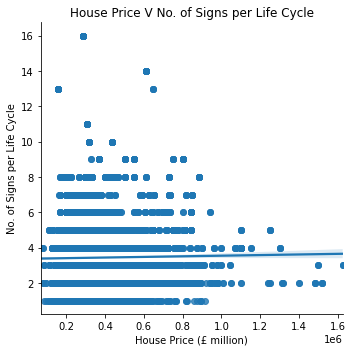

In [8]:
sns.lmplot(x= 'sale_price', y= 'cycle_count', data= df_sale_price)

plt.title('House Price V No. of Signs per Life Cycle')
plt.xlabel('House Price (£ million)')
plt.ylabel('No. of Signs per Life Cycle')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'H2) House Price V No. of Signs per Life Cycle.png'))

The graph show an almost zero linear correlation between house price and the number of signs per life cycle.

## Linear Regression Analysis

### reshape the data points into NumPy arrays, and place in seperate objects X (independent) and y (dependent)

In [8]:
X = df_sale_price['sale_price'].values.reshape(-1,1)
X

array([[147000],
       [285000],
       [535000],
       ...,
       [245000],
       [245000],
       [530000]], dtype=int64)

In [9]:
y = df_sale_price['cycle_count'].values.reshape(-1,1)
y

array([[3],
       [3],
       [2],
       ...,
       [4],
       [4],
       [1]], dtype=int64)

### split X and y data into Training and Test sets - 70:30

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### create a regression line to fit into the Training set

In [11]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Data is now trained on the Training set and must now be tested on the Test set.

### predict the values of y (Dependent) using X (Independent) on the Test set

In [12]:
y_predicted = regression.predict(X_test)

### create a plot that shows the regression line from the model Test set

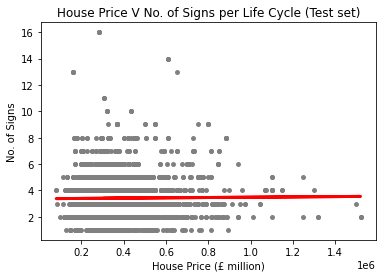

In [25]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)

plot_test.title('House Price V No. of Signs per Life Cycle (Test set)')
plot_test.xlabel('House Price (£ million)')
plot_test.ylabel('No. of Signs')

plt.savefig(os.path.join(vizpath,'H2) House Sale Price V No. of Signs per Life Cycle (Test set).png'))

### calculate the summary statistics for the above plot
  - 1)	Correlation Coefficient or Pearson's r: 
        - the strength of a relationship between the independent and dependent variable (-1 to +1)
        
  - 2)	R-Squared or Coefficient of Determination: 
        - a measure of how well the regression predictions approximate the real data points (%).
        
  - 3)	Root Mean Squared Error (RMSE): 
        - a single measure of predictive accuracy that explains the difference between the actual data points and the predicted data points (value relative to data, small error is better fit).
        
  - 4)	Slope Coefficient:  
        - The regression line fit to the data based on the 'rate of change of y as per X value' (%).

In [14]:
r2 = r2_score(y_test, y_predicted)
r2

-0.0012932881062566182

In [15]:
mse = mean_squared_error(y_test, y_predicted)
mse

3.2031988261701057

### print the predictive model statistics to assess the performance

In [16]:
print('R2 Score: ', r2)
print('Mean Squared Error (in units2): ', mse)
print('Slope Coefficient:' ,regression.coef_)

R2 Score:  -0.0012932881062566182
Mean Squared Error (in units2):  3.2031988261701057
Slope Coefficient: [[1.16256602e-07]]


#### Interpretation:
  - If R-Squared is a negative value this means that the model does not fit the data, and therefore cannot be used for predictions.

### confirm lack of prediction with data values: actual vs predicted

In [17]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,3.422193
1,2,3.409986
2,3,3.440794
3,5,3.423355
4,1,3.394873
5,4,3.418705
6,2,3.410858
7,2,3.385223
8,3,3.409405
9,2,3.410567


In [18]:
y_predicted_train = regression.predict(X_train)

### compare statistics

In [19]:
mse_y = mean_squared_error(y_train, y_predicted_train)
r2_y = r2_score(y_train, y_predicted_train)

In [20]:
print('R2 score: ', r2_y)
print('Mean squared error: ', mse_y)
print('Slope:' ,regression.coef_)

R2 score:  0.00012646022870321794
Mean squared error:  3.113191798012369
Slope: [[1.16256602e-07]]


Results are similar and still not a good prediction.

### show as visualisation

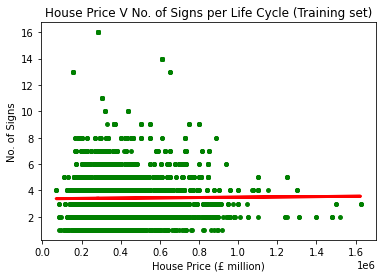

In [24]:
plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)

plot_train.title('House Price V No. of Signs per Life Cycle (Training set)')
plot_train.xlabel('House Price (£ million)')
plot_train.ylabel('No. of Signs')

plt.savefig(os.path.join(vizpath,'H2) House Sale Price V No. of Signs per Life Cycle (Training set).png'))

### add columns signs_per_district

In [23]:
df_sale_price['signs_per_district'] = df_sale_price.groupby(['district']) ['quantity'].transform(np.sum)
df_sale_price.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,property_type,new_property,ppd_addr1,ppd_addr2,road_name,locality,town_city,district,county,signs_per_district
0,8371,25/09/2020 13:32,26/09/2020 14:29,1.04,25.0,Truemans,TRU,Truemans @Hove,450,Sales,...,F,N,THEOBALD HOUSE,FLAT 57,BLACKMAN STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
1,8371,25/09/2020 13:32,26/09/2020 14:29,1.04,25.0,Truemans,TRU,Truemans @Hove,450,Sales,...,F,N,THEOBALD HOUSE,FLAT 61,BLACKMAN STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
2,6729,01/08/2020 16:18,02/08/2020 10:56,0.78,18.6,Weatherill Property Group,WEA,WeatherillProperty @Hangleton,640,Sales,...,D,N,68,NaN,MILLCROFT,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
3,6729,05/02/2021 15:00,06/02/2021 11:25,0.85,20.4,Weatherill Property Group,WEA,WeatherillProperty @Hangleton,640,Sales,...,D,N,68,NaN,MILLCROFT,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
4,5592,30/06/2020 06:49,01/07/2020 10:23,1.15,27.6,John Hoole,JHO,JohnHoole @Brighton,700,Sales,...,F,N,11,GROUND FLOOR FLAT,EXETER STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281


### export to CSV

In [24]:
df_sale_price.shape

(9312, 61)

In [25]:
df_sale_price.to_csv(os.path.join(dataset,'stone_signs_portal_v6.2_sold_price - 9,312.csv'), index=False)